In [1]:
#Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from yellowbrick.classifier import ConfusionMatrix


In [2]:
with open ('/Users/luizeduardovedoato/DEV/Nayve_Census/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [18]:
RN_census =  MLPClassifier(verbose= True, max_iter= 1000, tol= 0.000010, hidden_layer_sizes=(55,55))
RN_census.fit(X_census_treinamento,Y_census_treinamento)

Iteration 1, loss = 0.37865947
Iteration 2, loss = 0.32443145
Iteration 3, loss = 0.31396260
Iteration 4, loss = 0.30667843
Iteration 5, loss = 0.30173094
Iteration 6, loss = 0.29749947
Iteration 7, loss = 0.29448111
Iteration 8, loss = 0.29213555
Iteration 9, loss = 0.28905372
Iteration 10, loss = 0.28735667
Iteration 11, loss = 0.28500988
Iteration 12, loss = 0.28312990
Iteration 13, loss = 0.28123102
Iteration 14, loss = 0.27940463
Iteration 15, loss = 0.27749476
Iteration 16, loss = 0.27538832
Iteration 17, loss = 0.27358131
Iteration 18, loss = 0.27262082
Iteration 19, loss = 0.27094419
Iteration 20, loss = 0.26891282
Iteration 21, loss = 0.26781358
Iteration 22, loss = 0.26613419
Iteration 23, loss = 0.26464662
Iteration 24, loss = 0.26273652
Iteration 25, loss = 0.26179131
Iteration 26, loss = 0.25998737
Iteration 27, loss = 0.25831191
Iteration 28, loss = 0.25734535
Iteration 29, loss = 0.25676776
Iteration 30, loss = 0.25574791
Iteration 31, loss = 0.25315637
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [19]:
previsoes_RN = RN_census.predict(X_census_teste)
previsoes_RN


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [20]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [21]:
accuracy_score(Y_census_teste, previsoes_RN)

0.8131013306038894

0.8131013306038894

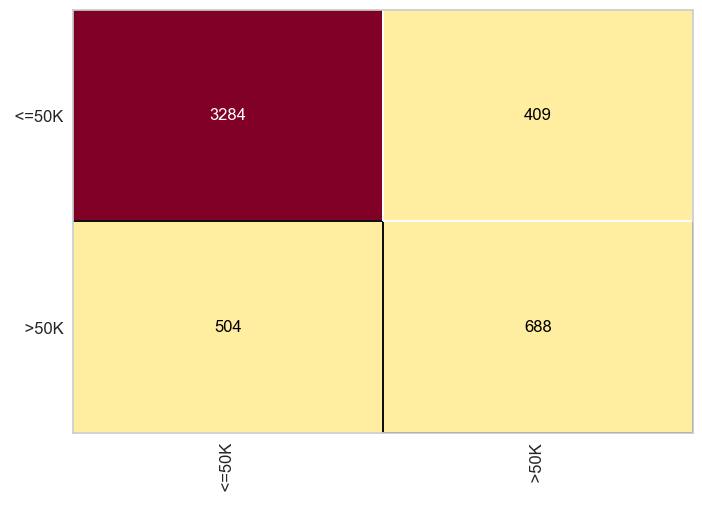

In [22]:
cm = ConfusionMatrix(RN_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [23]:
print(classification_report(Y_census_teste, previsoes_RN))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      3693
        >50K       0.63      0.58      0.60      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.73      0.74      4885
weighted avg       0.81      0.81      0.81      4885

